## Setup

In [1]:
from __future__ import division, print_function, absolute_import

In [2]:
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
sns.set()

/usr/local/manual/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
from lsst.sims.catalogs.measures.instance import InstanceCatalog
import lsst.sims.catUtils.baseCatalogModels as bcm
from lsst.sims.catalogs.generation.db import CatalogDBObject, DBObject
from lsst.sims.catUtils.baseCatalogModels.GalaxyModels import GalaxyTileObj, GalaxyObj
from lsst.sims.utils import ObservationMetaData

/Users/rbiswas/src/LSST/sims_catalogs_generation/python/lsst/sims/catalogs/generation/db/dbConnection.py:438: UserWarning: Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/Users/rbiswas/src/LSST/sims_catalogs_generation/python/lsst/sims/catalogs/generation/db/dbConnection.py:438: UserWarning: Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')


## Catalogs

In [5]:
observerMetaData = ObservationMetaData(boundType='box',
                                  pointingRA=0.,
                                  pointingDec=0.,
                                  boundLength=0.1)

In [6]:
observerMetaData_1 = ObservationMetaData(boundType='box',
                                  pointingRA=0.,
                                  pointingDec=-4.,
                                  boundLength=0.1)

In [7]:
class galCopy(InstanceCatalog):
    column_outputs = ['galtileid', 'raJ2000', 'decJ2000', 'redshift']#, 'a_d', 'b_d', 'pa_disk', 'mass_stellar', 'absmag_r_total']
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'a_d': '%8e', 'b_d': '%8e', 'pa_disk': '%8e', 
                        'mass_stellar': '%8e', 'absmag_r_total': '%8e'}

In [8]:
def galIds(tileID, galTileID):
    return galTileID - 100000000* tileID

In [9]:
galaxyTiled = GalaxyTileObj()

/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geopoint'
  return fn(*arg, **kw)


#### On Base Patch

In [10]:
constr='redshift < 0.4'
gBase = galCopy(galaxyTiled, obs_metadata=observerMetaData, constraint=constr)
gBase.write_catalog('gBase.csv')
gBase_df  = pd.read_csv('gBase.csv', delimiter=', ',index_col='#galtileid')
gBase_df.index.name = 'galtileid'
gBase_df.head()

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.


,raJ2000,decJ2000,redshift
galtileid,,,
2205265201,0.000979,-0.001562,0.1903
2207290310,0.000859,-0.001621,0.1844
2208421301,0.000202,-0.001585,0.1896
2203122801,0.001097,-0.000317,0.1996
2211329554,0.000725,-0.000021,0.1906


In [11]:
gBase_df['id'] = galIds(22, gBase_df.index.values)
gBase_df.set_index('id', inplace=True)
gBase_df.head()

,raJ2000,decJ2000,redshift
id,,,
5265201,0.000979,-0.001562,0.1903
7290310,0.000859,-0.001621,0.1844
8421301,0.000202,-0.001585,0.1896
3122801,0.001097,-0.000317,0.1996
11329554,0.000725,-0.000021,0.1906


#### On a Tile 4 degrees South

In [12]:
gTile_1 = galCopy(galaxyTiled, obs_metadata=observerMetaData_1, constraint=constr)
gTile_1.write_catalog('gTile_1.csv')
gTile1_df  = pd.read_csv('gTile_1.csv', delimiter=', ', index_col='#galtileid')
gTile1_df.index.name = 'galtileid'
gTile1_df.head()

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


,raJ2000,decJ2000,redshift
galtileid,,,
2112219713,0.000923,-0.071535,0.1912
2105265201,0.000892,-0.071335,0.1903
2107290310,0.000772,-0.071394,0.1844
2108421301,0.000113,-0.071357,0.1896
2103122801,0.001014,-0.070091,0.1996


In [13]:
gTile1_df['id'] = galIds(21, gTile1_df.index.values)
gTile1_df.set_index('id', inplace=True)
gTile1_df.rename(columns={'raJ2000':'raJ2000_1', 'decJ2000':'decJ2000_1', 'redshift': 'redshift_1'},
                 inplace=True)
gTile1_df.head()

,raJ2000_1,decJ2000_1,redshift_1
id,,,
12219713,0.000923,-0.071535,0.1912
5265201,0.000892,-0.071335,0.1903
7290310,0.000772,-0.071394,0.1844
8421301,0.000113,-0.071357,0.1896
3122801,0.001014,-0.070091,0.1996


In [14]:
merged =  pd.concat([gBase_df, gTile1_df], axis=1)

In [15]:
# Translate the ra values to around 0 for plotting ease
merged['shiftedRA']  = np.where(merged.raJ2000 < 3., merged.raJ2000, merged.raJ2000 - 2.0*np.pi)
merged['shiftedRA_1']  = np.where(merged.raJ2000_1 < 3., merged.raJ2000_1, merged.raJ2000_1 - 2.0*np.pi)

In [16]:
merged.head()

,raJ2000,decJ2000,redshift,raJ2000_1,decJ2000_1,redshift_1,shiftedRA,shiftedRA_1
id,,,,,,,,
157,0.000261,0.000750,0.2212,0.000179,-0.069021,0.2212,0.000261,0.000179
3439,0.000843,0.000985,0.1980,0.000762,-0.068788,0.1980,0.000843,0.000762
5199,0.000280,0.001694,0.3295,0.000200,-0.068077,0.3295,0.000280,0.000200
6482,0.000062,0.001331,0.2883,NaN,NaN,NaN,0.000062,NaN
7260,0.000818,-0.000958,0.2405,0.000733,-0.070730,0.2405,0.000818,0.000733


In [17]:
uncommon = merged[merged.isnull().any(axis=1)].copy()

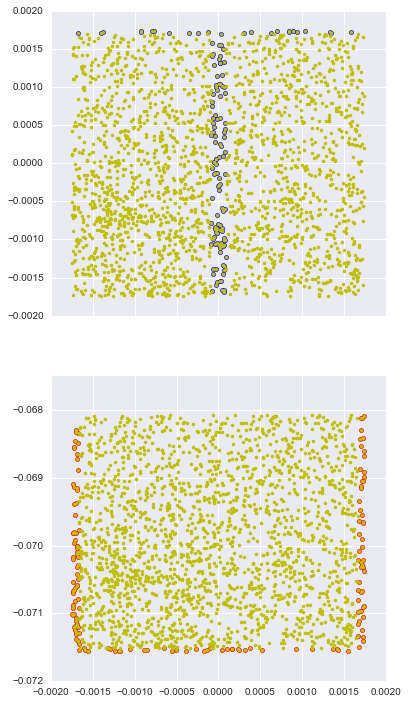

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(6, 12), sharex=True)
ax[0].plot(merged.shiftedRA, merged.decJ2000, 'y.')
ax[0].scatter(uncommon.shiftedRA, uncommon.decJ2000, color='b')

ax[1].plot(merged.shiftedRA_1, merged.decJ2000_1, 'y.')
ax[1].scatter(uncommon.shiftedRA_1, uncommon.decJ2000_1, color='r')



In [19]:
print(len(uncommon)/2., (len(gBase_df) + len(gTile1_df) )/2.)

143.0 2228.0


In [20]:
np.sqrt(2228.)

47.201694884823787

In [21]:
len(merged[merged.shiftedRA_1.isnull()])

134

In [22]:
len(merged[merged.shiftedRA.isnull()])

152

In [23]:
len(merged)

2371

## Angular Separations

In [24]:
common = merged[~merged.isnull().any(axis=1)]

In [25]:
NSelect = 100
sel = np.random.choice(common.index.values, NSelect*2, replace=False)

In [26]:
split_1 = common.ix[sel[:NSelect]]
split_2 = common.ix[sel[NSelect:]]

In [27]:
print(len(split_1), len(split_2))

100 100


In [28]:
split_1

,raJ2000,decJ2000,redshift,raJ2000_1,decJ2000_1,redshift_1,shiftedRA,shiftedRA_1
id,,,,,,,,
400502732326,6.282782,-0.000168,0.0887,6.282866,-0.069939,0.0887,-0.000403,-0.000319
400501827140,6.282579,-0.000357,0.3695,6.282663,-0.070129,0.3695,-0.000606,-0.000522
400502760052,6.281785,-0.000054,0.2881,6.281867,-0.069828,0.2881,-0.001400,-0.001318
400506307884,6.281658,-0.001212,0.3502,6.281742,-0.070986,0.3502,-0.001527,-0.001443
400503968617,6.281785,-0.000893,0.2539,6.281869,-0.070666,0.2539,-0.001400,-0.001316
14177870,0.001154,0.001297,0.3122,0.001075,-0.068476,0.3122,0.001154,0.001075
3245632,0.000919,-0.000257,0.3330,0.000836,-0.070030,0.3330,0.000919,0.000836
400503318986,6.282899,-0.001134,0.2685,6.282986,-0.070905,0.2685,-0.000286,-0.000199
400501790506,6.282968,0.000220,0.1982,6.283052,-0.069552,0.1982,-0.000217,-0.000133


In [29]:
from lsst.sims.utils import haversine

In [30]:
df = pd.DataFrame({'ids_1': split_1.index.values,
                   'ids_2': split_2.index.values,
                   'raJ2000': split_1.raJ2000.values,
                   'decJ2000':split_1.decJ2000.values,
                   'raJ2000_2': split_2.raJ2000.values,
                   'decJ2000_2':split_2.decJ2000.values,
                   'angsep': haversine(split_1.decJ2000.values, split_1.raJ2000.values, split_2.decJ2000.values, 
                                       split_2.raJ2000.values),
                  'angsep_1': haversine(split_1.decJ2000_1.values, split_1.raJ2000_1.values, split_2.decJ2000_1.values, 
                                       split_2.raJ2000_1.values)}
                   #'angsep_1': haversine(split_1.decJ2000_1, split_1.raJ2000_1, split_2.decJ2000_1, split_2.raJ2000_1)}
                  )

In [31]:
df['ratio'] = df.angsep_1/df.angsep 

In [32]:
df.ratio.describe()

count    100.000000
mean       0.970262
std        0.037197
min        0.846058
25%        0.946301
50%        0.996094
75%        1.000305
max        1.004705
Name: ratio, dtype: float64

In [33]:
df.ratio.isnull().any()

False

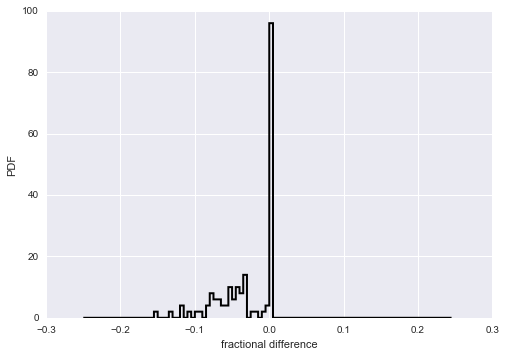

In [34]:
fig, ax = plt.subplots()
_ = ax.hist(df.ratio.values - 1., bins=np.arange(-0.25, 0.25, 0.005),normed=1,
        histtype='step', alpha=1, lw=2., color='k')
# sns.kdeplot(df.ratio - 1., ax=ax)
ax.set_xlabel('fractional difference')
ax.set_ylabel('PDF')

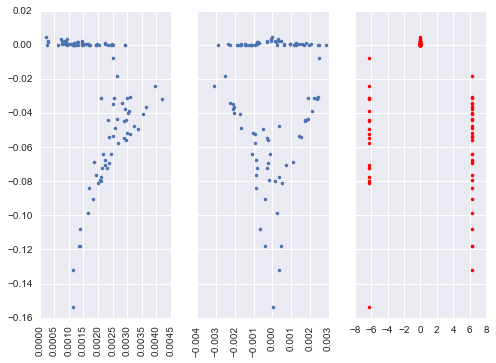

In [49]:
fig, ax = plt.subplots(1, 3, sharey=True)
ax[0].plot(df.angsep, df.ratio-1, '.')
xticks = ax[0].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[1].plot(df.decJ2000 - df.decJ2000_2, df.ratio - 1, '.')
xticks = ax[1].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[2].plot(df.raJ2000 - df.raJ2000_2, df.ratio - 1, '.r')

## Scratch

In [50]:
df.raJ2000.max()

6.2830949999999994

In [51]:
df.raJ2000.min()

0.0001649683

In [52]:
gTile1_df.raJ2000_1.min()

4.9064210000000001e-06

In [53]:
gTile1_df.raJ2000_1.max()

6.2831849999999996

In [54]:
gBase_df.raJ2000.min()

2.492506e-06

In [56]:
np.degrees(gBase_df.raJ2000.max())

359.99992510412659